---

# SVD

In [178]:
# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd # 역행렬 구할 때 사용

# 4x4 행렬 
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))


[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [179]:
U, sigma, Vt = svd(a)

print('[shape]\n',U.shape, sigma.shape, Vt.shape)
print('[U]\n',np.round(U,3)) # U
print('[sigma]\n',np.round(sigma, 3))
print('[Vt]\n',np.round(Vt, 3))

[shape]
 (4, 4) (4,) (4, 4)
[U]
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
[sigma]
 [3.423 2.023 0.463 0.079]
[Vt]
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


> 한 가지 유의할 점은 sigma의 경우 0이 아닌 값만 1차원으로 추출했으므로 다시 0을 포함한 대칭행렬로 변환한 뒤에 내적을 수행해야 한다.

In [180]:
# sigma를 다시 0을 포함한 대칭행렬로 변환
sigma_mat = np.diag(sigma) # sigma 값으로 대각행렬 생성
a_ = np.dot(np.dot(U, sigma_mat), Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


# Truncated SVD

In [159]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우 U, simga, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('[원본행렬]\n', matrix)

U, sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원\n', U.shape, sigma.shape, Vt.shape)
print('\nsigma값 행렬\n', sigma) # sigma 특이값 확인

# Truncated SVD로 sigma행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nSVD분해 행렬 차원\n', U_tr.shape, sigma_tr.shape, Vt_tr.shape)
print('\nsigma값 행렬\n', sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(sigma_tr)), Vt_tr)

print('\nTruncated SVD로 분해 후 복원 행렬\n', matrix_tr)

print('\n 원본 행렬과 Truncated SVD 분해 후 복원 행렬과 근사값을 가지는 것을 볼 수 있다.')

[원본행렬]
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원
 (6, 6) (6,) (6, 6)

sigma값 행렬
 [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

SVD분해 행렬 차원
 (6, 4) (4,) (4, 6)

sigma값 행렬
 [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0.6740867  0.73812389]
 [0

## sklearn Truncated SVD클래스를 이용한 변환

Text(0, 0.5, 'TruncatedSVD Component2')

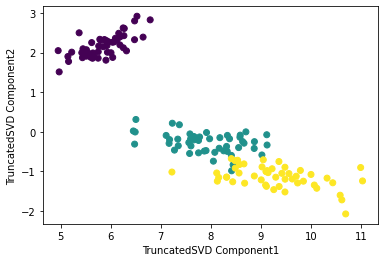

In [166]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data

# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현, 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c = iris.target)
plt.xlabel('TruncatedSVD Component1')
plt.ylabel('TruncatedSVD Component2')


> 붓꽃 데이터를 스케일링으로 변환한 뒤에 TruncatedSVD로 나타내보자

2.3350707941312738e-15
4.85722573273506e-17


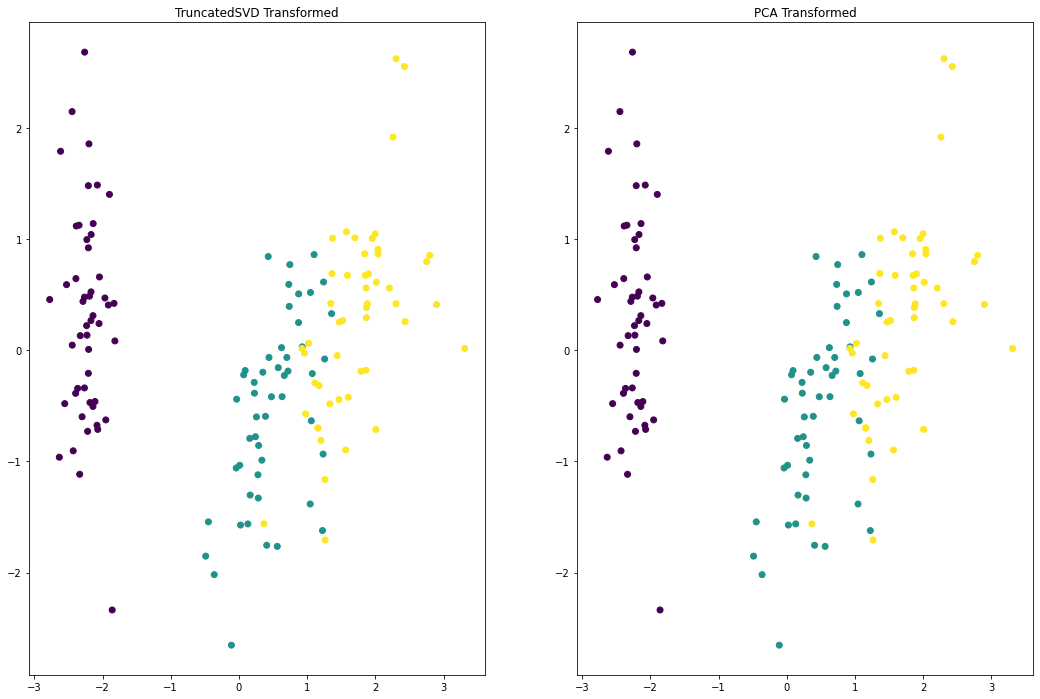

In [177]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler() 
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일된 데이터를 기반으로 ,TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일 된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(18,12), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y =iris_pca[:,1], c=iris.target)
ax1.set_title('TruncatedSVD Transformed')
ax2.set_title('PCA Transformed')

print((iris_pca - iris_tsvd).mean()) 
print((pca.components_ - tsvd.components_).mean())